# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Save config information
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url =f"{url}appid={weather_api_key}&units={units}&q="
    

In [4]:
#set up list to hold response info

city_dicts=[]
city_counter = 0

for city in cities:
    response=requests.get(query_url + city).json()
    city_counter+=1 
#     if city_counter%50==0:
#         time.sleep(.2)
    try:
    #append lists for scatterplots later
        city_dict= {}
        city_dict["city"] = city
        city_dict["country"] = response['sys']['country']
        city_dict["date"] = response['dt']
        city_dict["lat"] = response['coord']['lat']
        city_dict["lng"] = response['coord']['lon']
        city_dict["temp"] = response['main']['temp']
        city_dict["max temp"] = response['main']['temp_max']
        city_dict["humidity"] =response['main']['humidity']
        city_dict["cloudiness"] =response['clouds']['all']
        city_dict["wind_speed_mph"] = response['wind']['speed']
        city_dicts.append(city_dict)
        time.sleep(.2)
    #need city number to print
        print(f"{city_counter} {city}")
        
    except:
        print(f"{city_counter} {city} not found")
        pass

1 mataura
2 msowero
3 hilo
4 saskylakh
5 nikolskoye
6 marzuq
7 kutum
8 gazanjyk
9 teeli
10 esperance
11 chokurdakh
12 jamestown
13 ubinskoye
14 constitucion
15 arraial do cabo
16 ushuaia
17 kawalu
18 hambantota
19 cape town
20 provideniya
21 goderich
22 mys shmidta not found
23 luis correia
24 punta arenas
25 thompson
26 hobart
27 kruisfontein
28 tarata
29 tasiilaq
30 bonavista
31 berestechko
32 caravelas
33 nioro
34 mar del plata
35 tuatapere
36 puerto ayora
37 half moon bay
38 upernavik
39 illoqqortoormiut not found
40 atuona
41 lasa
42 weligama
43 iquique
44 albany
45 rock springs
46 rikitea
47 fort nelson
48 longyearbyen
49 scottsbluff
50 marsaxlokk
51 villeneuve-sur-lot
52 bredasdorp
53 cabedelo
54 kalmunai
55 talnakh
56 busselton
57 husavik
58 juneau
59 kihei
60 divo
61 aklavik
62 kavaratti
63 camana
64 richards bay
65 lumphat
66 palmer
67 kudahuvadhoo
68 lorengau
69 katsuura
70 murray bridge
71 diego de almagro
72 hermanus
73 hithadhoo
74 faanui
75 ribeira grande
76 shirokiy
77 

590 sinazongwe
591 puerto rico
592 dera bugti
593 lazaro cardenas
594 auriflama
595 pokhara
596 doctor pedro p. pena not found
597 florianopolis
598 lodja
599 champerico
600 rantauprapat
601 jubayl not found
602 lieto
603 rio de janeiro
604 youkounkoun
605 majene
606 raudeberg
607 gustavo diaz ordaz
608 satara
609 mechanicsville
610 paamiut
611 sistranda
612 port lincoln
613 namibe
614 imbituba
615 the valley
616 luebo
617 puerto penasco
618 dhidhdhoo
619 japura
620 ojinaga
621 vadinsk
622 vaitape
623 kahului
624 yarada
625 port shepstone
626 ancud
627 aloleng
628 college
629 zilupe
630 batemans bay
631 taldan
632 manchenky
633 fortuna
634 gobabis
635 talitsy
636 kota belud
637 zambezi
638 bokspits not found
639 pacific grove
640 samarai
641 lompoc
642 hihifo not found
643 mercedes
644 santander de quilichao


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create DataFrame
city_weather_df = pd.DataFrame(
    city_dicts
)

city_weather_df

,city,country,date,lat,lng,temp,max temp,humidity,cloudiness,wind_speed_mph
0,mataura,NZ,1620175024,-46.1927,168.8643,57.99,57.99,52,9,5.01
1,msowero,TZ,1620175025,-6.5333,37.2000,69.33,69.33,91,100,4.36
2,hilo,US,1620174797,19.7297,-155.0900,75.78,82.40,57,20,10.36
3,saskylakh,RU,1620175026,71.9167,114.0833,29.82,29.82,93,100,8.70
4,nikolskoye,RU,1620175026,59.7035,30.7861,35.20,35.60,93,75,4.47
...,...,...,...,...,...,...,...,...,...,...
593,pacific grove,US,1620175362,36.6177,-121.9166,58.32,59.00,83,31,7.85
594,samarai,PG,1620175412,-10.6167,150.6667,82.24,82.24,72,16,12.08
595,lompoc,US,1620175412,34.6391,-120.4579,66.87,72.00,59,2,12.66
596,mercedes,AR,1620175413,-34.6515,-59.4307,51.66,52.00,78,100,1.99


In [6]:
city_weather_df.to_csv("city_weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_df.describe()

,date,lat,lng,temp,max temp,humidity,cloudiness,wind_speed_mph
count,5.980000e+02,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,1.620175e+09,18.991460,12.636018,61.851555,62.363512,70.702341,52.670569,7.280853
std,1.367788e+02,32.969279,89.788613,16.836456,16.958366,21.519849,41.411974,4.860913
min,1.620175e+09,-54.800000,-175.200000,17.600000,17.600000,6.000000,0.000000,0.220000
25%,1.620175e+09,-8.904150,-66.290750,49.720000,50.000000,60.000000,6.000000,3.440000
50%,1.620175e+09,22.628650,17.875550,64.400000,64.400000,75.000000,57.500000,6.285000
75%,1.620175e+09,46.579250,85.872675,75.802500,75.990000,88.000000,99.000000,10.215000
max,1.620175e+09,78.218600,178.416700,95.900000,96.800000,100.000000,100.000000,33.380000


In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity_100 = city_weather_df[city_weather_df['humidity']>100].index

cities_humidity_100

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(cities_humidity_100, inplace = False)

In [10]:

clean_city_data

,city,country,date,lat,lng,temp,max temp,humidity,cloudiness,wind_speed_mph
0,mataura,NZ,1620175024,-46.1927,168.8643,57.99,57.99,52,9,5.01
1,msowero,TZ,1620175025,-6.5333,37.2000,69.33,69.33,91,100,4.36
2,hilo,US,1620174797,19.7297,-155.0900,75.78,82.40,57,20,10.36
3,saskylakh,RU,1620175026,71.9167,114.0833,29.82,29.82,93,100,8.70
4,nikolskoye,RU,1620175026,59.7035,30.7861,35.20,35.60,93,75,4.47
...,...,...,...,...,...,...,...,...,...,...
593,pacific grove,US,1620175362,36.6177,-121.9166,58.32,59.00,83,31,7.85
594,samarai,PG,1620175412,-10.6167,150.6667,82.24,82.24,72,16,12.08
595,lompoc,US,1620175412,34.6391,-120.4579,66.87,72.00,59,2,12.66
596,mercedes,AR,1620175413,-34.6515,-59.4307,51.66,52.00,78,100,1.99


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

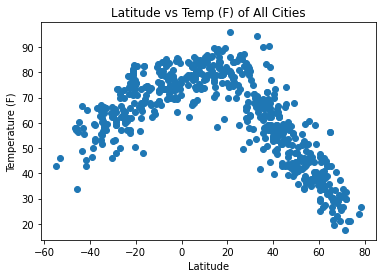

This plot is showcasing Latitude and Temp(F) of the cities on the list. You can see almost an upside down U shape, indictating around 0 (the equator) is where we see higher temperatures. The correlation coefficicent between latitude and temperature (F) is -0.54.


In [30]:
all_lat = clean_city_data['lat']
all_temp = clean_city_data['temp']

#create scatter plot
plt.scatter(all_lat, all_temp)
plt.title("Latitude vs Temp (F) of All Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("AllLatTemp.png")
plt.show()


print(f"This plot is showcasing Latitude and Temp(F) of the cities on the list. You can see almost an upside down U shape, indictating around 0 (the equator) is where we see higher temperatures. The correlation coefficicent between latitude and temperature (F) is {round(st.pearsonr(all_lat, all_temp)[0],2)}.")

## Latitude vs. Humidity Plot

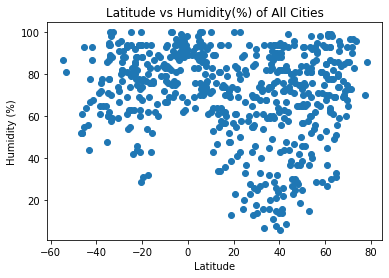

This plot is showing Latitude vs. Humidity of all the cities. There is not a strong pattern to show a relationship. The correlation coefficicent between latitude and humidity(%) is -0.18.


In [31]:
all_humid = clean_city_data['humidity']

#create scatter plot
plt.scatter(all_lat, all_humid)
plt.title("Latitude vs Humidity(%) of All Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("AllLatHumidity.png")
plt.show()


print(f"This plot is showing Latitude vs. Humidity of all the cities. There is not a strong pattern to show a relationship. The correlation coefficicent between latitude and humidity(%) is {round(st.pearsonr(all_lat, all_humid)[0],2)}.")

## Latitude vs. Cloudiness Plot

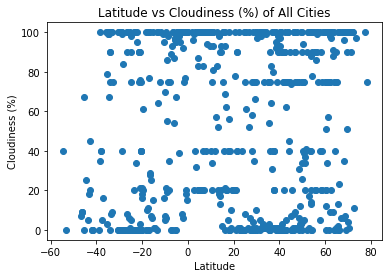

This plot is showing Latitude vs. Cloudiness of the cities. Again, there is not a strong relationship between the two factors. The correlation coefficicent between latitude and cloudiness (%) is 0.05.


In [32]:
all_clouds = clean_city_data['cloudiness']

#create scatter plot
plt.scatter(all_lat, all_clouds)
plt.title("Latitude vs Cloudiness (%) of All Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("AllLatCloudiness.png")
plt.show()


print(f"This plot is showing Latitude vs. Cloudiness of the cities. Again, there is not a strong relationship between the two factors. The correlation coefficicent between latitude and cloudiness (%) is {round(st.pearsonr(all_lat, all_clouds)[0],2)}.")

## Latitude vs. Wind Speed Plot

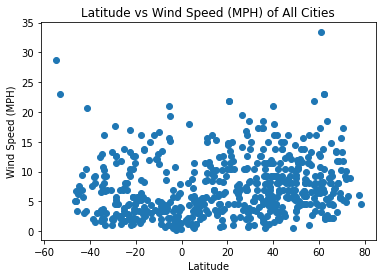

This plot is showing Latitude vs. Wind Speed (MPH). There is not a strong relationship between the two. Most cities are at 15MPH or lower. The correlation coefficicent between latitude and temp is 0.16.


In [33]:
all_wind = clean_city_data['wind_speed_mph']

#create scatter plot
plt.scatter(all_lat, all_wind)
plt.title("Latitude vs Wind Speed (MPH) of All Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("AllLatWindSpeed.png")
plt.show()


print(f"This plot is showing Latitude vs. Wind Speed (MPH). There is not a strong relationship between the two. Most cities are at 15MPH or lower. The correlation coefficicent between latitude and temp is {round(st.pearsonr(all_lat, all_wind)[0],2)}.")

## Linear Regression

In [15]:
Northern_H_Cities = clean_city_data[clean_city_data['lat']>=0]
NH_Max_Temp = Northern_H_Cities['max temp']
NH_Lat = Northern_H_Cities['lat']
NH_Humid = Northern_H_Cities['humidity']
NH_Clouds = Northern_H_Cities['cloudiness']
NH_Wind = Northern_H_Cities['wind_speed_mph']

Southern_H_Cities = clean_city_data[clean_city_data['lat']<0]
SH_Max_Temp = Southern_H_Cities['max temp']
SH_Lat = Southern_H_Cities['lat']
SH_Humid = Southern_H_Cities['humidity']
SH_Clouds = Southern_H_Cities['cloudiness']
SH_Wind = Southern_H_Cities['wind_speed_mph']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
def linear_1(x, y, title, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=16,color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue**2}")
    

The r-squared is: 0.7740244183978267


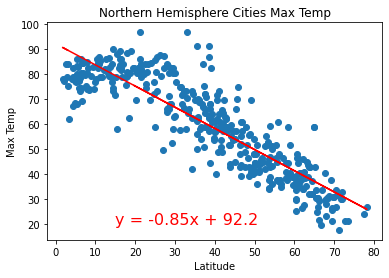

In [44]:
linear_1(NH_Lat, NH_Max_Temp, 'Northern Hemisphere Cities Max Temp', 'Max Temp', (15,20))
plt.savefig("NH_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5016992259206292


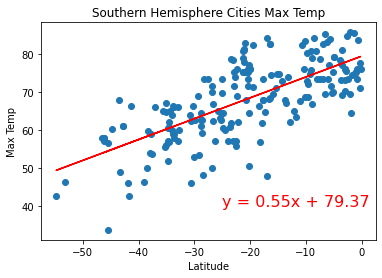

In [45]:
linear_1(SH_Lat, SH_Max_Temp, 'Southern Hemisphere Cities Max Temp', 'Max Temp', (-25,40))
plt.savefig("SH_Temp.png")
plt.show()

### Analysis
* In both graphs, you see Max Temp rises as you get closer to the Equator (latitude 0)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.2665132393250464e-05


<function matplotlib.pyplot.show(close=None, block=None)>

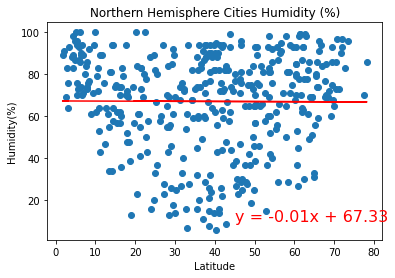

In [46]:
linear_1(NH_Lat, NH_Humid, 'Northern Hemisphere Cities Humidity (%)', 'Humidity(%)', (45,10))
plt.savefig("NH_Humid.png")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07665522375280039


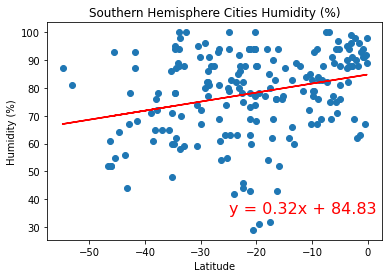

In [47]:
linear_1(SH_Lat, SH_Humid, 'Southern Hemisphere Cities Humidity (%)', 'Humidity (%)', (-25,35))
plt.savefig("SH_Humid.png")
plt.show()

### Analysis 
* These two graphs are comparing city latitude to humidity. 
* The northern hemisphere cities do not see a strong relationship and the southern hemisphere cities show a slightly more positive relationship where humidity % increases as you get closer to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 6.607046842486512e-07


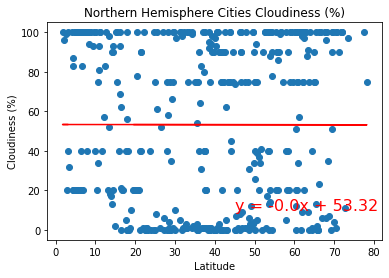

In [48]:
linear_1(NH_Lat, NH_Clouds, 'Northern Hemisphere Cities Cloudiness (%)', 'Cloudiness (%)', (45,10))
plt.savefig("NH_Clouds.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05819022235811367


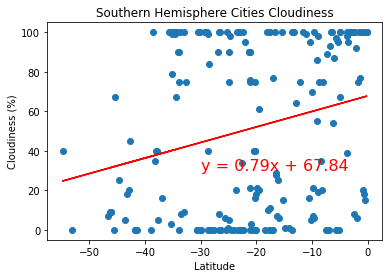

In [49]:
linear_1(SH_Lat, SH_Clouds, 'Southern Hemisphere Cities Cloudiness','Cloudiness (%)', (-30,30))
plt.savefig("SH_Clouds.png")
plt.show()

### Analysis
* These graphs are comparing latitude and cloudiness (%). 
* You see a slightly negative relationship between cloudiness and lat in Northern Hemisphere cities and a slightly positive relationship in Southern Hemisphere cities. 
* As you get closer to the equator, you see a higher % of cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024197027667526214


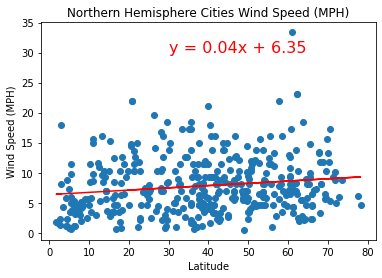

In [50]:
linear_1(NH_Lat, NH_Wind, 'Northern Hemisphere Cities Wind Speed (MPH)','Wind Speed (MPH)', (30,30))
plt.savefig("NH_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.040896977498360174


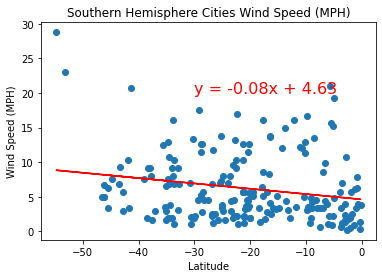

In [51]:
linear_1(SH_Lat, SH_Wind, 'Southern Hemisphere Cities Wind Speed (MPH)','Wind Speed (MPH)', (-30,20))
plt.savefig("SH_Wind.png")
plt.show()

### Analysis
* These two graphs are comparing latitude and wind speed. This time we see as the city gets closer to the equator, the wind speed gets lower.